tgb - 9/22/2020 - Check that statistics converge in the limit of large aquaplanet sample number.  

For second round of revisions of the PRL physical constraints paper

# Imports

In [83]:
# tgb - 4/22/2019 - Use +1K as validation dataset
# tgb - 4/19/2019 - The goal is to make a slurm-callable script to calculate the statistics and residuals of all the paper neural networks over the validation dataset. This script is specialized to the +0K experiment.
# tgb - 1/6/2019 - Rerunning the statistics over the training set

import os
#os.chdir('/filer/z-sv-pool12c/t/Tom.Beucler/SPCAM/CBRAIN-CAM')
os.chdir('/export/home/tbeucler/CBRAIN-CAM')
from cbrain.imports import *
from cbrain.data_generator import *
from cbrain.cam_constants import *
from cbrain.losses import *
from cbrain.utils import limit_mem
from cbrain.layers import *
import tensorflow as tf
import tensorflow.math as tfm
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import xarray as xr
import numpy as np
from cbrain.model_diagnostics import ModelDiagnostics

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as imag
import pickle
# Otherwise tensorflow will use ALL your GPU RAM for no reason
limit_mem()
#TRAINDIR = '/local/Tom.Beucler/SPCAM_PHYS/'
TRAINDIR = '/DFS-L/DATA/pritchard/tbeucler/SPCAM/'
#DATADIR = '/project/meteo/w2w/A6/S.Rasp/SP-CAM/fluxbypass_aqua/'
DATADIR = '/DFS-L/DATA/pritchard/tbeucler/SPCAM/fluxbypass_aqua/'

#config_fn = '/filer/z-sv-pool12c/t/Tom.Beucler/SPCAM/CBRAIN-CAM/pp_config/8col_rad_tbeucler_local_PostProc.yml'
config_fn = '/export/home/tbeucler/CBRAIN-CAM/pp_config/8col_rad_tbeucler_local_PostProc.yml'
#data_fn = '/local/Tom.Beucler/SPCAM_PHYS/8col009_01_train.nc'
data_fn_array = [TRAINDIR+'SPCAM_PHYS/8col009_01_train_shuffle.nc',
                TRAINDIR+'SPCAM_PHYS/8col009_01_valid.nc',
                TRAINDIR+'SPCAM_PHYS/8col009_01_test.nc']
dict_lay = {'SurRadLayer':SurRadLayer,'MassConsLayer':MassConsLayer,'EntConsLayer':EntConsLayer}

NNa = ['JNNL']

# Stats calculation over an increasing amount of randomly drawn samples without replacement

In [156]:
Conv = {}
ndraw = 250

In [157]:
for NNs in NNa:
    print('NNs = ',NNs)
    NN = {}; md = {}; Conv[NNs] = {}
    
    # 1) Load model
    path = TRAINDIR+'HDF5_DATA/'+NNs+'.h5'
    NN = load_model(path,custom_objects=dict_lay)
    
    # 2) Define model diagnostics object
    for datas in data_fn_array:
        md = ModelDiagnostics(NN,config_fn,datas)
        Conv[NNs][datas[-16:-3]] = stats_rand_draw(md,ndraw)
    
    # 3) Calculate statistics and save in pickle file
#    md.compute_stats()
#     path = TRAINDIR+'HDF5_DATA/'+NNs+'md_train.pkl'
#     pickle.dump(md.stats,open(path,'wb'))
#     print('Stats are saved in ',path)
    
#     # 4) Calculate budget residuals and save in pickle file
#     md.compute_res()
#     path = TRAINDIR+'HDF5_DATA/'+NNs+'res_train.pkl'
#     pickle.dump(md.res,open(path,'wb'))
#     print('Budget residuals are saved in ',path)

NNs =  JNNL


/data11/home/tbeucler/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


/data11/home/tbeucler/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


/data11/home/tbeucler/CBRAIN-CAM/notebooks/tbeucler_devlog/cbrain/model_diagnostics.py:25: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  config = yaml.load(f)


In [158]:
pathPKL = '/export/home/tbeucler/CBRAIN-CAM/notebooks/tbeucler_devlog/PKL_DATA/'
pathHOME = '/export/home/tbeucler/'

In [159]:
hf = open(pathPKL+'2020_09_22_Convergence_statistics.pkl','wb')
pickle.dump(Conv,hf)
# hf.close()

In [160]:
Conv.keys()

dict_keys(['JNNL'])

In [161]:
Conv['JNNL'].keys()

dict_keys(['train_shuffle', 'l009_01_valid', 'ol009_01_test'])

In [162]:
Conv['JNNL']['train_shuffle'].keys()

dict_keys(['mse', 'mse_std', 'true_sqmean', 'true_var'])

In [163]:
Conv['JNNL']['train_shuffle']['mse'].shape

(250,)

In [164]:
nb_sample_xaxis = 64*128*np.arange(0,250,1)

In [165]:
nb_sample_xaxis

array([      0,    8192,   16384,   24576,   32768,   40960,   49152,
         57344,   65536,   73728,   81920,   90112,   98304,  106496,
        114688,  122880,  131072,  139264,  147456,  155648,  163840,
        172032,  180224,  188416,  196608,  204800,  212992,  221184,
        229376,  237568,  245760,  253952,  262144,  270336,  278528,
        286720,  294912,  303104,  311296,  319488,  327680,  335872,
        344064,  352256,  360448,  368640,  376832,  385024,  393216,
        401408,  409600,  417792,  425984,  434176,  442368,  450560,
        458752,  466944,  475136,  483328,  491520,  499712,  507904,
        516096,  524288,  532480,  540672,  548864,  557056,  565248,
        573440,  581632,  589824,  598016,  606208,  614400,  622592,
        630784,  638976,  647168,  655360,  663552,  671744,  679936,
        688128,  696320,  704512,  712704,  720896,  729088,  737280,
        745472,  753664,  761856,  770048,  778240,  786432,  794624,
        802816,  811

# SI Plot

In [166]:
fz = 15
lw = 4
siz = 100
S0 = 320 # Representative mean solar insolation for normalization purposes
S0max = 1410.6442 # Max solar insolation for normalization purposes
SN = S0/100 # Representative target = mean insolation / 4
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YMIN = -1 # Representative value for conserving network
YTEXT = 0.3 # Text placement

In [167]:
plt.rc('text', usetex=False)
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
mpl.rcParams['lines.linewidth'] = lw
plt.close('all')

In [168]:
COL = ['r','b','k']
LABEL = ['Training','Validation','Test']

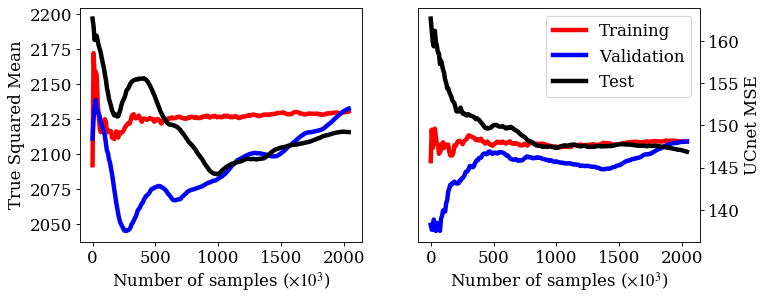

In [180]:
f = plt.figure(num=None, figsize=(10,4), dpi=80, facecolor='w', edgecolor='k')
plt.gcf().subplots_adjust(bottom=0.15) # Make room for xlabels

### Subplot 1 ###

ax1 = f.add_subplot(1,2,2)

ax1.yaxis.tick_right()
ax1.yaxis.set_label_position("right")

for ikey,key in enumerate(Conv['JNNL'].keys()):
    ax1.plot(nb_sample_xaxis/1e3,
             Conv['JNNL'][key]['mse'],
             color=COL[ikey],
             label=LABEL[ikey])
#     ax1.plot(nb_sample_xaxis,
#              Conv['JNNL'][key]['true_var'],
#              color=COL[ikey],
#              linestyle='--')
ax1.set_xlabel('Number of samples ($\\times 10^{3}$)')
ax1.set_ylabel('UCnet MSE')
ax1.legend()

ax2 = f.add_subplot(1,2,1)

for ikey,key in enumerate(Conv['JNNL'].keys()):
    ax2.plot(nb_sample_xaxis/1e3,
             Conv['JNNL'][key]['true_sqmean'],
             color=COL[ikey],
             label=LABEL[ikey])
ax2.set_xlabel('Number of samples ($\\times 10^{3}$)')
ax2.set_ylabel('True Squared Mean')
    
plt.draw()
plt.savefig(pathHOME+'FigSI_Convergence.pdf',format='pdf')

# Miscellaneous

In [30]:
#nt = 15

In [31]:
#t_random = np.random.choice(np.linspace(0,md.valid_gen.n_batches-1,md.valid_gen.n_batches),size=((nt,)),replace=False).astype('int')

In [32]:
psum = np.zeros((md.nlat, md.nlon, md.valid_gen.n_outputs))
tsum = np.copy(psum)
sse = np.copy(psum)
psqsum = np.copy(psum)
tsqsum = np.copy(psum)

Stats = {}
Stats['mse'] = np.zeros((nt,))
Stats['true_sqmean'] = np.zeros((nt,))
Stats['true_var'] = np.zeros((nt,))

for itime in tqdm(range(nt)):
    t, p = md.get_truth_pred(itime)  # [lat, lon, var, lev]
    # Compute statistics
    psum += p
    tsum += t
    psqsum += p ** 2
    tsqsum += t ** 2
    sse += (t - p) ** 2
    pmean = psum / (itime+1)
    tmean = tsum / (itime+1)
    
    Stats['mse'][itime] = (sse / (itime+1)).mean()
    Stats['true_sqmean'][itime] = (tsqsum / (itime+1)).mean()
    Stats['true_var'][itime] = (tsqsum / (itime+1) - tmean ** 2).mean()

# # Compute average statistics
# Stats = {}
# # pmean = psum / nt
# # tmean = tsum / nt
# #Stats['bias'] = pmean - tmean
# Stats['mse'] = sse / nt
# Stats['true_sqmean'] = tsqsum / nt
# Stats['true_var'] = tsqsum / nt - tmean ** 2

In [33]:
Stats['mse'].shape

(15,)

In [54]:
plt.plot(Conv['true_var'])

KeyError: 'true_var'

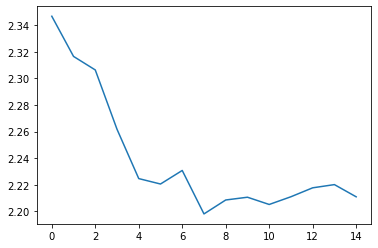

In [35]:
plt.plot(Stats['mse'])

# Function for random draw and stats

In [155]:
def stats_rand_draw(md,nb_draw):
    
    t_random = np.random.choice(np.linspace(0,md.valid_gen.n_batches-1,md.valid_gen.n_batches),
                                size=((nb_draw,)),
                                replace=False).astype('int')
    
    psum = np.zeros((md.nlat, md.nlon, md.valid_gen.n_outputs))
    tsum = np.copy(psum)
    sse = np.copy(psum)
    psqsum = np.copy(psum)
    tsqsum = np.copy(psum)

    Stats = {}
    Stats['mse'] = np.zeros((nb_draw,))
    Stats['mse_std'] = np.zeros((nb_draw,))
    Stats['true_sqmean'] = np.zeros((nb_draw,))
    Stats['true_var'] = np.zeros((nb_draw,))

    for itime in tqdm(range(nb_draw)):
        t, p = md.get_truth_pred(itime)  # [lat, lon, var, lev]
        # Rescale
        t *= (md.valid_gen.output_transform.scale)
        p *= (md.valid_gen.output_transform.scale)

        # Compute statistics
        psum += p
        tsum += t
        psqsum += p ** 2
        tsqsum += t ** 2
        sse += (t - p) ** 2
        pmean = psum / (itime+1)
        tmean = tsum / (itime+1)

        Stats['mse'][itime] = (sse / (itime+1)).mean()
        Stats['mse_std'][itime] = (sse / (itime+1)).std()
        Stats['true_sqmean'][itime] = (tsqsum / (itime+1)).mean()
        Stats['true_var'][itime] = (tsqsum / (itime+1) - tmean ** 2).mean()
        
    return Stats

In [41]:
A = stats_rand_draw(md,5)

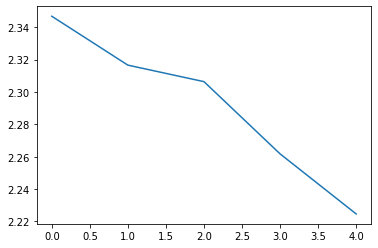

In [42]:
plt.plot(A['mse'])